# `Insurance Claims- Fraud Detection`
## Problem Statement:
Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
## Importing the librabries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the dataset:
df=pd.read_csv('Automobile_insurance_fraud.csv')
pd.set_option('max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


- We can see at df.head() method some features have '?' as a value. So we have to replace these values.

In [3]:
### checking the shape of the dataset:
df.shape

(1000, 40)

- There are 1000 rows and 40 columns present in my dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- There is mixture of the data types. We have float,objecct and integer datatype features.
- _c39 has all null values we will check it again and if we find that we will drop it immediately.
- `policy_bind_date` is a date but we see that it is also in object datatype ,So we will extract day month and year from it.

In [5]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- As we assume that _c39 has 1000 Nan present. So We will Drop it now.

In [6]:
df.drop('_c39',axis=1,inplace=True)

In [7]:
### Checkin value count:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)
        print(df[i].value_counts())
        print("\n**************************************************************************\n")

policy_bind_date
01-01-2006    3
05-08-1992    3
28-04-1992    3
28-12-2002    2
14-04-1992    2
             ..
01-05-1999    1
27-09-2010    1
05-11-2008    1
22-01-1993    1
16-03-1998    1
Name: policy_bind_date, Length: 951, dtype: int64

**************************************************************************

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

**************************************************************************

policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

**************************************************************************

insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

**************************************************************************

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

*********

- `Collision_type`,`Property_damage`  and `Polica_report_available features have '?' sign type values.Let's replace them with Nan's 

In [8]:
## renaming the features:
df=df.rename(columns={'capital-gains':'capital_gains','capital-loss':'capital_loss'})

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

#### Replacing '?' with Nan

In [10]:
### checking the '?' value present rows:
df.replace('?',np.nan,inplace=True)

In [11]:
### now checking nulls now
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

- collision_type has 178 nulls
- property_damage has 360 nulls
- police_report_available has 343 nulls
Dropping 360 columns from a dataset(containing NaN) that contains 1000 columns might lead to a considerable loss of data. Since all three columns that contain NaN values are of categorical type, let's replace with it's most occuring value i.e. mode.

### Handling Missing Values:
Let's replace Nan with Mode() method.

In [12]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
### Checking Summary of Stats:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


### Observations:
- 'Maximum' age insurance claim person.
- The maximum annual premium is 2047.
- 'Capital_gains' has minimum value is zero and maximum value is 100500. it means there are too much of deviation available.
-  similarly for 'Capital_loss' has maximum value is zero but minimum value is -111100. Here we also see that too much of deviation.
- Maximum witnesses is not more then 3.
- Maximum claim and minimum claim amounts are 114920 and 100 respectvely.
- auto year is going 1995 to 2015.


Umbrella_limit has some negative value but it could be a wrong entry so we will drop it now.

In [14]:
df.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [15]:
df.umbrella_limit.replace({df.umbrella_limit.min():np.nan},inplace=True)
df.dropna(inplace=True)

In [16]:
df.isna().any().sum()

0

In [17]:
df.umbrella_limit.value_counts()

0.0           798
6000000.0      57
5000000.0      46
4000000.0      39
7000000.0      29
3000000.0      12
8000000.0       8
9000000.0       5
2000000.0       3
10000000.0      2
Name: umbrella_limit, dtype: int64

In [18]:
# check if there are duplicated present or not
df.duplicated(subset=None, keep='first').sum()

0

There are no duplicate entries.

# EDA:
Let's check first how many cases reported in this dataset:

N    752
Y    247
Name: fraud_reported, dtype: int64


N    0.752753
Y    0.247247
Name: fraud_reported, dtype: float64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

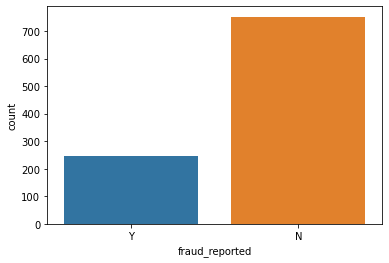

In [19]:
print(df['fraud_reported'].value_counts())
print("\n")
print(df['fraud_reported'].value_counts(normalize=True))
sns.countplot(df.fraud_reported)

We looking the distribution of target variable, their is skewness present, this is typically says as imbalanced dataset.

In [20]:
##Checking Age
df.age.max()

64

In [21]:
### age grouping with categories
def age_grouping(df):
    if(df.age <= 23):
        return '19 - 23'
    elif(df.age > 23 and df.age <= 30) : 
        return '24 - 30'
    elif(df.age > 30 and df.age <= 35) : 
        return '31 - 35'
    elif(df.age > 35 and df.age <= 40) : 
        return '36 - 40'
    elif(df.age > 40 and df.age <= 45) : 
        return '41 - 45'
    elif(df.age > 45 and df.age <= 50) : 
        return '46 - 50'
    elif(df.age > 50 and df.age <= 55) : 
        return '51 - 55'
    elif(df.age > 55 and df.age <= 59) : 
        return '56 - 59'
    else : 
        return '60+'

df['age_group'] = df.apply(age_grouping,axis = 1)

#Adjust category order
age_group_order = ['19 - 23', '24 - 30', '31 - 35', '36 - 40', '41 - 45', '46 - 50', '51 - 55', '56 - 59', '60+']
df['age_group'] = pd.Categorical(df['age_group'], categories = age_group_order, ordered=True)

In [22]:
AgeFraud= pd.crosstab(df['age_group'], df['fraud_reported'])
AgeFraud

fraud_reported,N,Y
age_group,,
19 - 23,10,6
24 - 30,141,40
31 - 35,140,55
36 - 40,162,39
41 - 45,134,49
46 - 50,86,23
51 - 55,36,14
56 - 59,25,12
60+,18,9


<AxesSubplot:xlabel='age_group'>

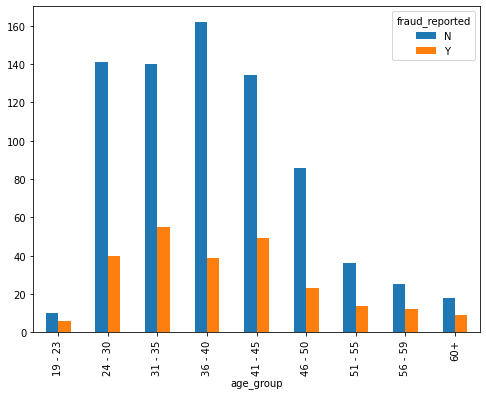

In [23]:
AgeFraud.plot(kind = 'bar', figsize = (8,6))

- We can see that, highest no. of frauds have been reported in the age range of 36-40.
- After looking at the graph we can say that age_group will highly correlate with target variable.

### incident_severity	 With   Target:

In [24]:
Incident_Vs_Fraud=pd.crosstab(columns=df['incident_severity'], index= df['fraud_reported'],normalize='index')
Incident_Vs_Fraud

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
fraud_reported,,,,
N,0.143617,0.420213,0.324468,0.111702
Y,0.676113,0.153846,0.145749,0.024291


<AxesSubplot:xlabel='fraud_reported'>

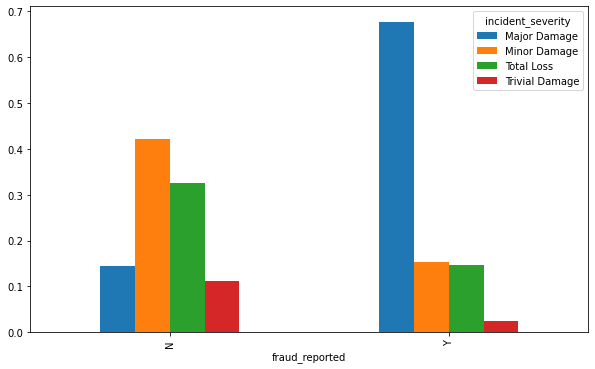

In [25]:
Incident_Vs_Fraud.plot.bar(figsize=(10,6))

As we can observe that incidents involving minor damage have higher cases of fraud report. Hence, incident_severity becomes a parameter for modeling.

Now, let's analyze total insurance claims v/s fraud reported.

In [26]:
### checking unique values:
df.nunique()

months_as_customer             391
age                             46
policy_number                  999
policy_bind_date               950
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  10
insured_zip                    994
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital_gains                  338
capital_loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_location              999
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries     

### Points:-
- Incident_location has 1000 unique values as our dataset has 1000 rows present so it means there is different location for each observation. So can not encode for  1000 location for this  small dataset. So we will drop it.
- similarly policy number is 1000 unique values. As policy number is a kind of identification number so we will also drop it.
- Similarly policy bind date has 951 unique values which is not acceptable. 
- Similarly for insured zip, incident location,incident_date,incident_state, 'insurred_hobbies','automake', auto_model',auto_year'

<AxesSubplot:xlabel='policy_state', ylabel='count'>

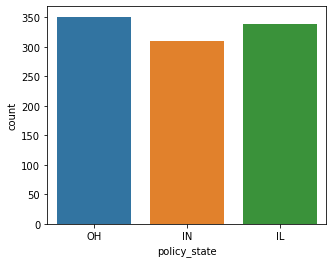

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(df['policy_state'])

- All policy states has similary data and it is also not related with target varible.
- The types of policies claimed by the customers are almost uniquely same with OH and IL type comapred to them IN is less claimed and most of them are not frauds among them 10% of them are reported as frauds.


### Gender

In [28]:
gender= pd.crosstab(df['insured_sex'], df['fraud_reported'])
gender

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,341,121


<AxesSubplot:xlabel='insured_sex'>

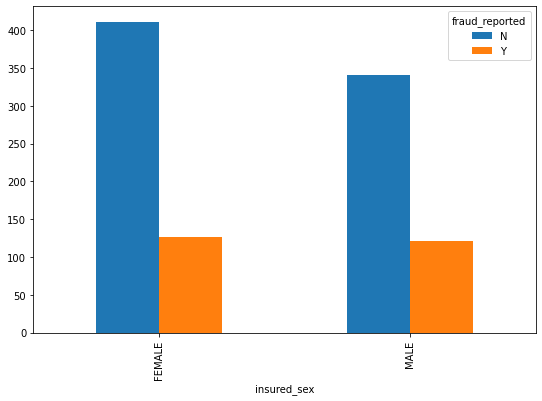

In [29]:
gender.plot.bar(figsize=(9,6))

- Male and Female are almost equally distributed.Gender becomes an important parameter to figure out the no. of cases reported overall. Female leads with highest number of fraud reported cases.
- Many of the female and male who claimed are not frauds only 120 members among them are reported as frauds.


In [30]:
## Your code here
df_fraud = df[df.fraud_reported == 'Y'].pivot_table(index='police_report_available',values='fraud_reported',aggfunc='count')

df_nfraud = df[df.fraud_reported == 'N'].pivot_table(index='police_report_available',values='fraud_reported',aggfunc='count')

p_report = pd.concat([df_fraud,df_nfraud],axis=1)
p_report

,fraud_reported,fraud_reported
police_report_available,,
NO,175,510
YES,72,242


Text(0.5, 0, "police report available'")

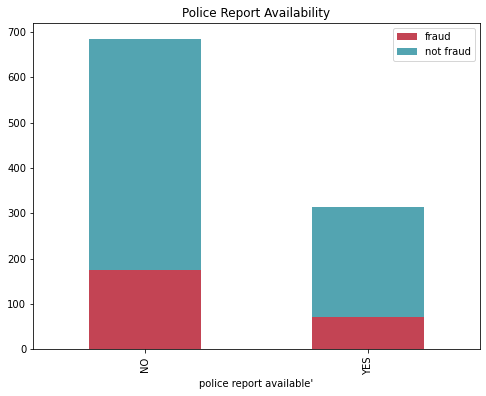

In [31]:
ax = p_report.plot.bar(stacked = 'police_report_available',color =['#c34454','#53a4b1'],title = "Police Report Availability", figsize=(8, 6))

# Plot Configuration
plt.legend(['fraud','not fraud'])
plt.xlabel("police report available'")

### Plotting heatmap:

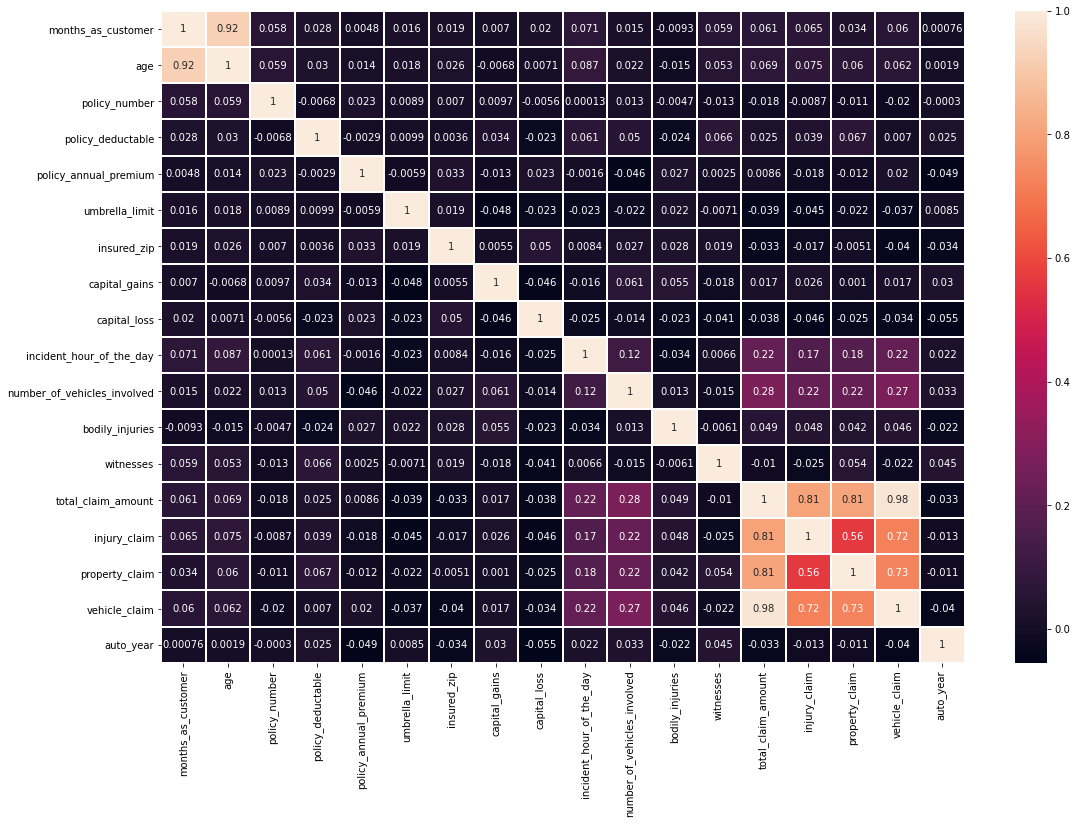

In [32]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

### Observation:
- From the above plot, we can see that there is high correlation between age and months_as_customer. We will drop AGE column.
- We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [33]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [34]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group
0,328,521585,17-10-2014,OH,250/500,1000,1406.91,0.0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,46 - 50
1,228,342868,27-06-2006,IN,250/500,2000,1197.22,5000000.0,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y,41 - 45
2,134,687698,06-09-2000,OH,100/300,2000,1413.14,5000000.0,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,24 - 30
3,256,227811,25-05-1990,IL,250/500,2000,1415.74,6000000.0,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,41 - 45
4,228,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000.0,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,41 - 45


### Feature Engineering:

first of all we extract categorical features:

In [35]:
# extracting categorical columns
cat_df = df.select_dtypes(include = ['object'])

In [36]:
cat_df.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [37]:
### Checkin unique values:
for i in cat_df:
    print(i)
    print(cat_df[i].unique())
    print("\n**************************************************************************\n")

policy_bind_date
['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

## Visualizations:

In [38]:
#dropping a column which is not required
df.drop(columns=['insured_hobbies'],axis=1,inplace=True)

In [39]:
## Defining a function for plotting the categorical Features:
def factor_plot(feature):
    plt.figure(figsize=(7,5))
    sns.factorplot(x='fraud_reported',col=feature,kind='count',data=df,size=4)
    plt.tight_layout()
    cross_tab=pd.crosstab(columns=df.fraud_reported,index=df[feature],normalize='index')
    return cross_tab

fraud_reported,N,Y
policy_csl,,
100/300,0.741379,0.258621
250/500,0.737892,0.262108
500/1000,0.783333,0.216667


<Figure size 504x360 with 0 Axes>

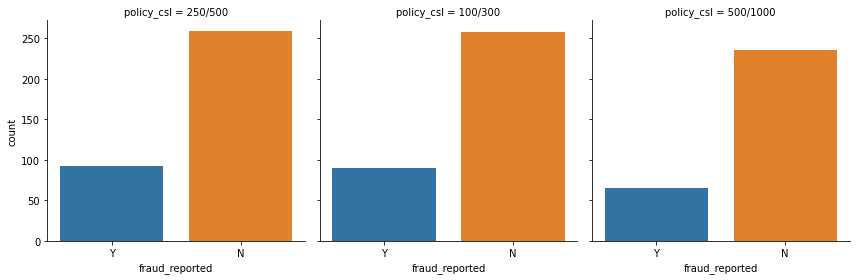

In [40]:
factor_plot('policy_csl')

All the plocy_csl is equaly distributed.

fraud_reported,N,Y
insured_education_level,,
Associate,0.763889,0.236111
College,0.737705,0.262295
High School,0.775000,0.225000
JD,0.739130,0.260870
MD,0.736111,0.263889
Masters,0.776224,0.223776
PhD,0.736000,0.264000


<Figure size 504x360 with 0 Axes>

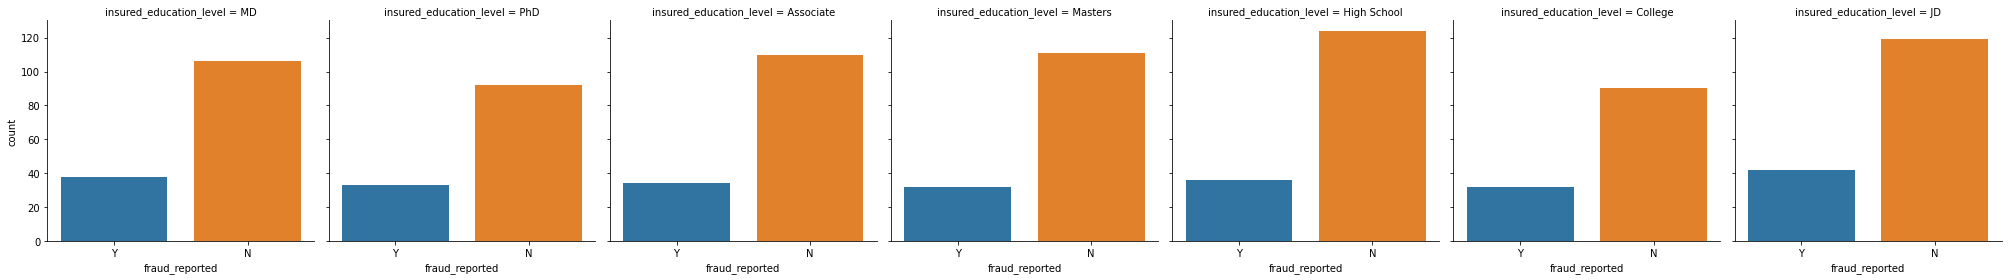

In [41]:
factor_plot('insured_education_level')

Education level is also equally distributed.

fraud_reported,N,Y
insured_occupation,,
adm-clerical,0.830769,0.169231
armed-forces,0.753623,0.246377
craft-repair,0.702703,0.297297
exec-managerial,0.631579,0.368421
farming-fishing,0.698113,0.301887
handlers-cleaners,0.796296,0.203704
machine-op-inspct,0.760870,0.239130
other-service,0.830986,0.169014
priv-house-serv,0.830986,0.169014


<Figure size 504x360 with 0 Axes>

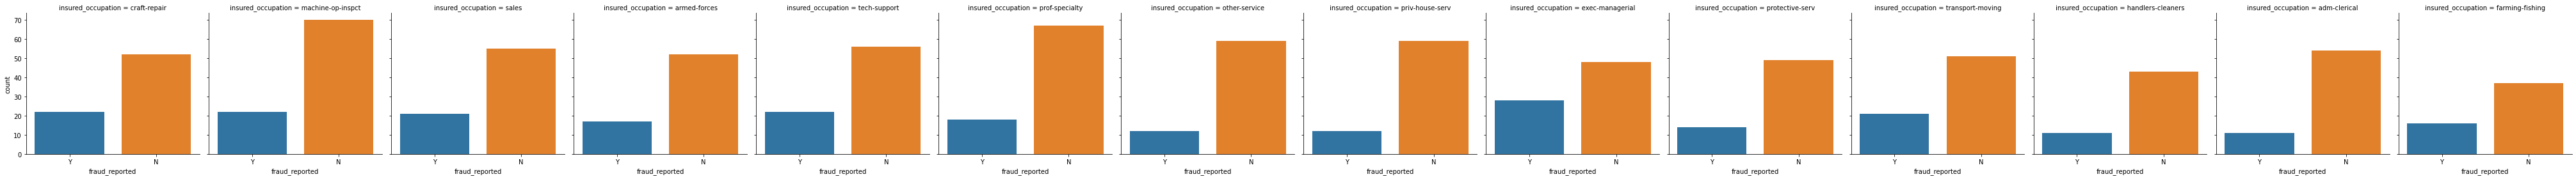

In [42]:
factor_plot('insured_occupation')

fraud_reported,N,Y
insured_relationship,,
husband,0.794118,0.205882
not-in-family,0.741379,0.258621
other-relative,0.706215,0.293785
own-child,0.786885,0.213115
unmarried,0.758865,0.241135
wife,0.727273,0.272727


<Figure size 504x360 with 0 Axes>

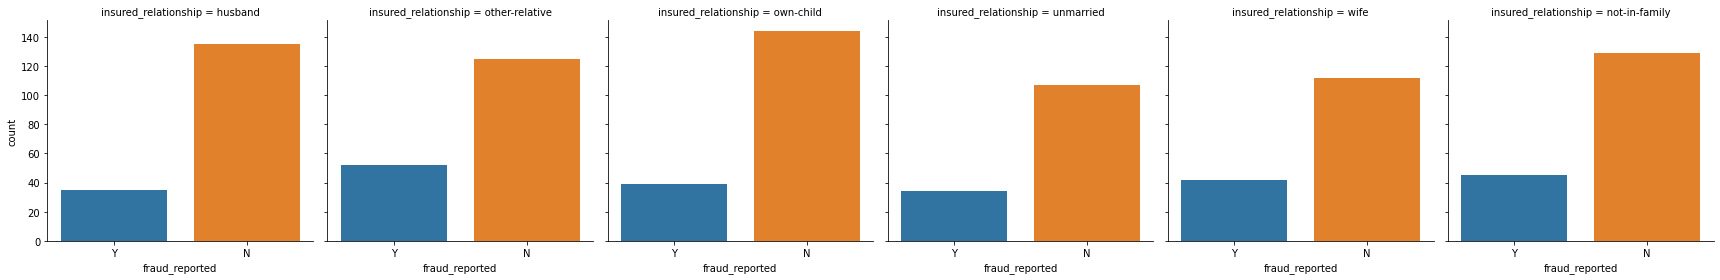

In [43]:
factor_plot('insured_relationship')

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,0.727924,0.272076
Parked Car,0.904762,0.095238
Single Vehicle Collision,0.708955,0.291045
Vehicle Theft,0.914894,0.085106


<Figure size 504x360 with 0 Axes>

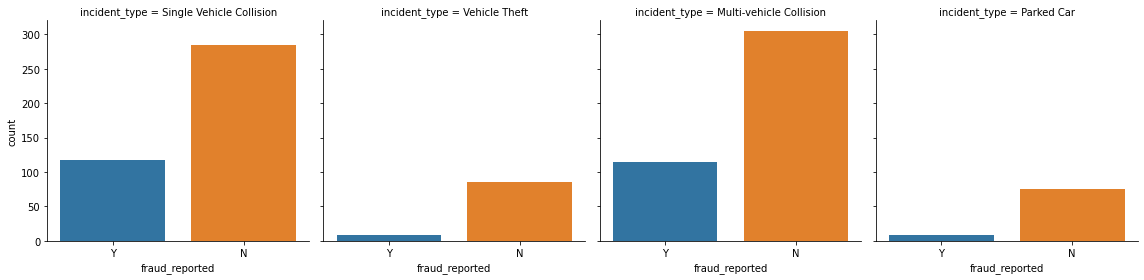

In [44]:
factor_plot('incident_type')

parked_car and vehicle_theft has highest chance of detect for As not fraud.

fraud_reported,N,Y
collision_type,,
Front Collision,0.724409,0.275591
Rear Collision,0.772340,0.227660
Side Collision,0.745455,0.254545


<Figure size 504x360 with 0 Axes>

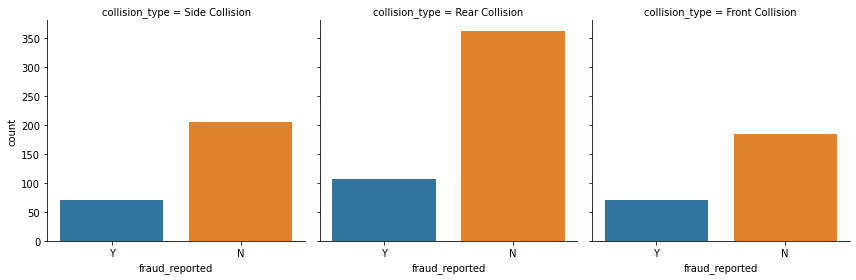

In [45]:
factor_plot('collision_type')

'Rear Collision' is little high chance to detech as not frauded.

fraud_reported,N,Y
incident_severity,,
Major Damage,0.392727,0.607273
Minor Damage,0.892655,0.107345
Total Loss,0.871429,0.128571
Trivial Damage,0.933333,0.066667


<Figure size 504x360 with 0 Axes>

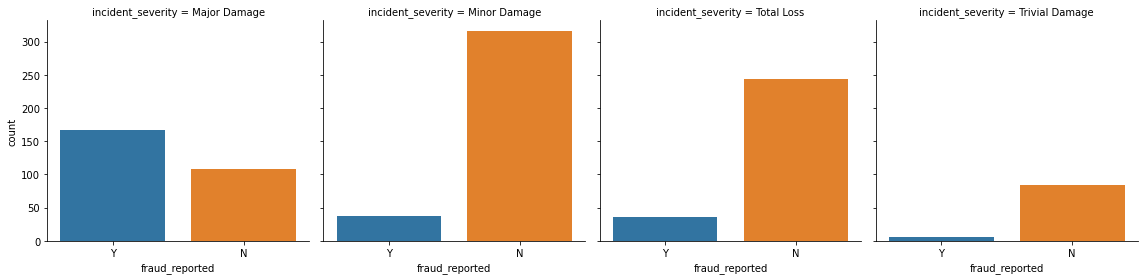

In [46]:
factor_plot('incident_severity')

Trivial Damage has high chance to detech  as not frauded.

fraud_reported,N,Y
authorities_contacted,,
Ambulance,0.707692,0.292308
Fire,0.730942,0.269058
None,0.934066,0.065934
Other,0.681818,0.318182
Police,0.791096,0.208904


<Figure size 504x360 with 0 Axes>

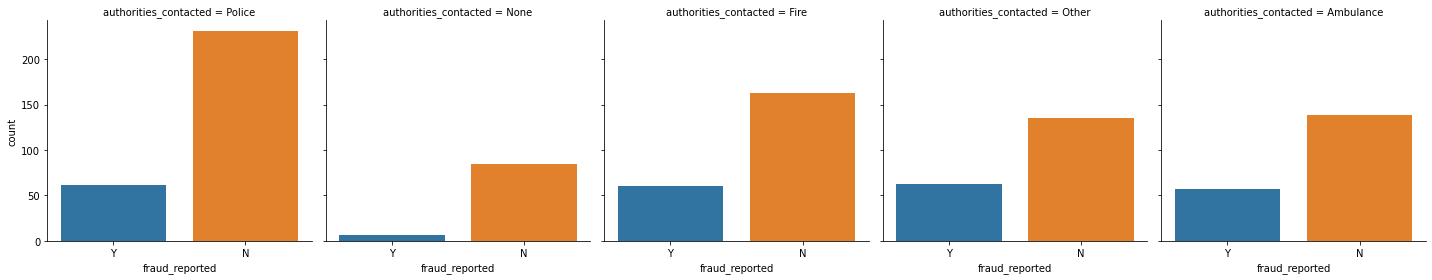

In [47]:
factor_plot('authorities_contacted')

fraud_reported,N,Y
incident_state,,
NC,0.688073,0.311927
NY,0.778626,0.221374
OH,0.565217,0.434783
PA,0.733333,0.266667
SC,0.705645,0.294355
VA,0.772727,0.227273
WV,0.820276,0.179724


<Figure size 504x360 with 0 Axes>

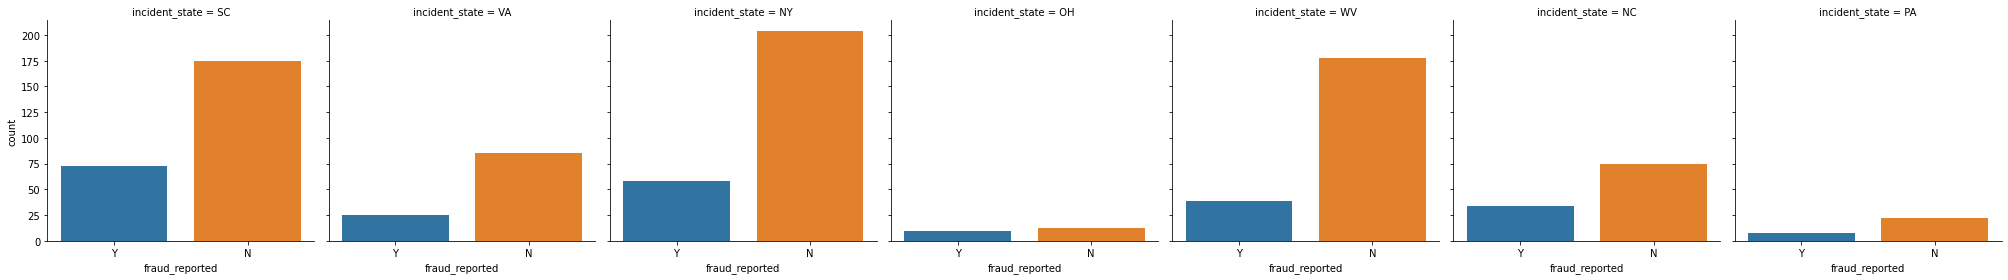

In [48]:
factor_plot('incident_state')

- 'OH' has high chance to detect as frauded.
- in other hand 'WV' has least chance to detect as not frauded.

fraud_reported,N,Y
incident_city,,
Arlington,0.708609,0.291391
Columbus,0.738255,0.261745
Hillsdale,0.751773,0.248227
Northbend,0.765517,0.234483
Northbrook,0.778689,0.221311
Riverwood,0.776119,0.223881
Springfield,0.757962,0.242038


<Figure size 504x360 with 0 Axes>

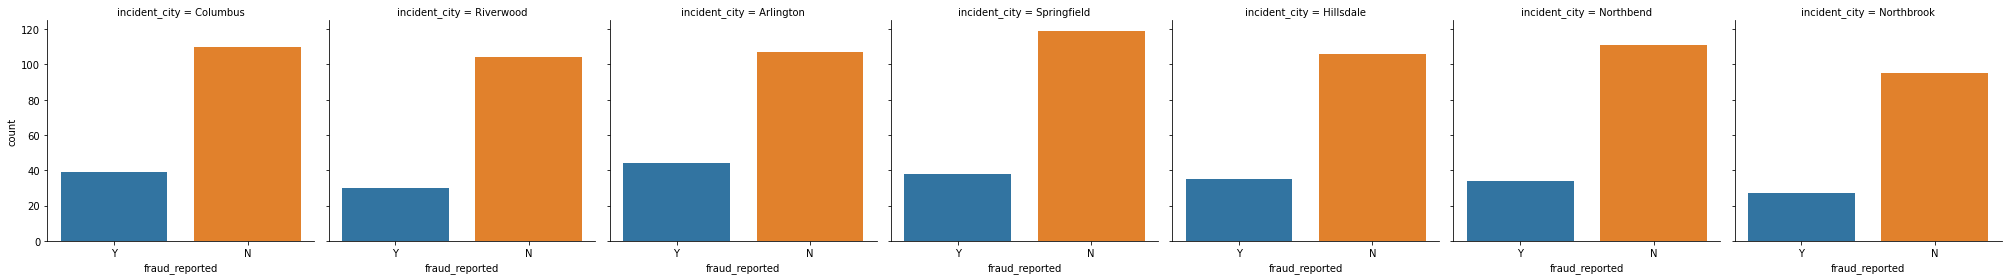

In [49]:
factor_plot('incident_city')

- All city has equally distributed fraud rate.

fraud_reported,N,Y
property_damage,,
NO,0.757880,0.242120
YES,0.740864,0.259136


<Figure size 504x360 with 0 Axes>

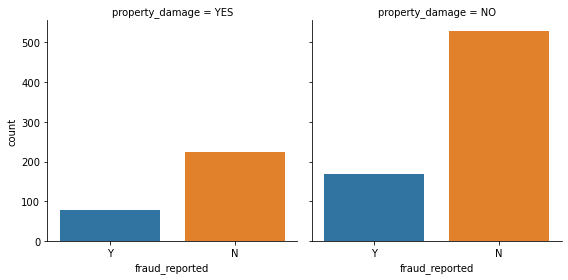

In [50]:
factor_plot('property_damage')

fraud_reported,N,Y
auto_make,,
Accura,0.808824,0.191176
Audi,0.695652,0.304348
BMW,0.722222,0.277778
Chevrolet,0.720000,0.280000
Dodge,0.750000,0.250000
Ford,0.694444,0.305556
Honda,0.745455,0.254545
Jeep,0.835821,0.164179
Mercedes,0.661538,0.338462


<Figure size 504x360 with 0 Axes>

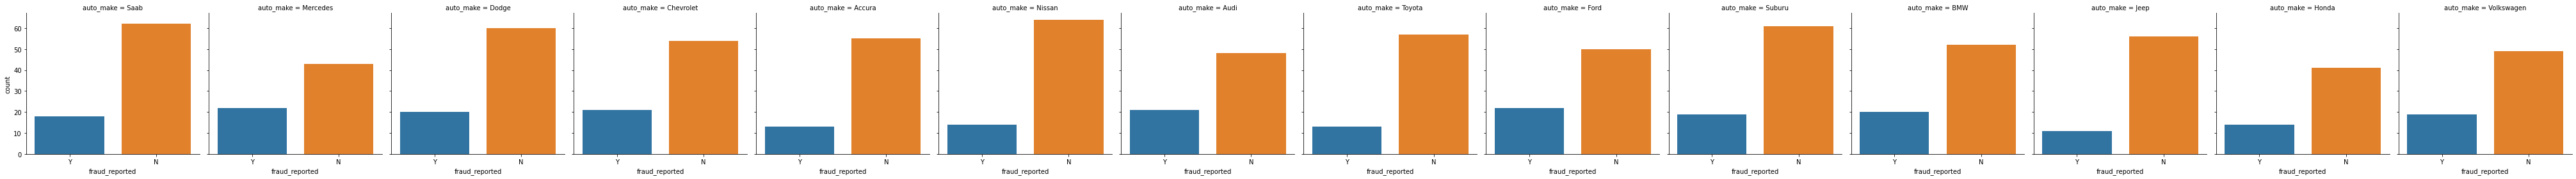

In [51]:
factor_plot('auto_make')

fraud_reported,N,Y
fraud_reported,,
N,1.0,0.0
Y,0.0,1.0


<Figure size 504x360 with 0 Axes>

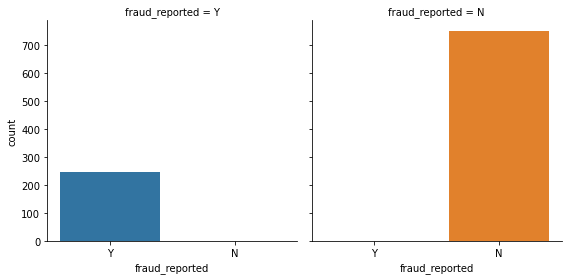

In [52]:
factor_plot('fraud_reported')

### Data Preprocessing:

In [53]:
df['policy_bind_day']=pd.to_datetime(df['policy_bind_date'],format="%d-%m-%Y").dt.day
df['policy_bind_month']=pd.to_datetime(df['policy_bind_date'],format="%d-%m-%Y").dt.month
df['policy_bind_year']=pd.to_datetime(df['policy_bind_date'],format="%d-%m-%Y").dt.year

In [54]:
df['incident_day']=pd.to_datetime(df['incident_date'],format="%d-%m-%Y").dt.day
df['incident_month']=pd.to_datetime(df['incident_date'],format="%d-%m-%Y").dt.month

In [55]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,521585,17-10-2014,OH,250/500,1000,1406.91,0.0,466132,MALE,MD,craft-repair,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,46 - 50,17,10,2014,25,1
1,228,342868,27-06-2006,IN,250/500,2000,1197.22,5000000.0,468176,MALE,MD,machine-op-inspct,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y,41 - 45,27,6,2006,21,1
2,134,687698,06-09-2000,OH,100/300,2000,1413.14,5000000.0,430632,FEMALE,PhD,sales,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,24 - 30,6,9,2000,22,2
3,256,227811,25-05-1990,IL,250/500,2000,1415.74,6000000.0,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,41 - 45,25,5,1990,10,1
4,228,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000.0,610706,MALE,Associate,sales,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,41 - 45,6,6,2014,17,2


In [56]:
policy_public=[]
policy_passenger=[]
for i in df['policy_csl']:
    policy_public.append(i.split('/')[0])
    policy_passenger.append(i.split('/')[1])
df['policy_public']=policy_public
df['policy_passenger']=policy_passenger
    

In [57]:
df.drop(columns=['policy_csl','policy_bind_date','incident_date'],axis=1,inplace=True)

In [58]:
df

,months_as_customer,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,328,521585,OH,1000,1406.91,0.0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,46 - 50,17,10,2014,25,1,250,500
1,228,342868,IN,2000,1197.22,5000000.0,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y,41 - 45,27,6,2006,21,1,250,500
2,134,687698,OH,2000,1413.14,5000000.0,430632,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,24 - 30,6,9,2000,22,2,100,300
3,256,227811,IL,2000,1415.74,6000000.0,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,41 - 45,25,5,1990,10,1,250,500
4,228,367455,IL,1000,1583.91,6000000.0,610706,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,41 - 45,6,6,2014,17,2,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,OH,1000,1310.80,0.0,431289,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,17440,8720,61040,Honda,Accord,2006,N,36 - 40,16,7,1991,22,2,500,1000
996,285,186934,IL,1000,1436.79,0.0,608177,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,18080,18080,72320,Volkswagen,Passat,2015,N,41 - 45,5,1,2014,24,1,100,300
997,130,918516,OH,500,1383.49,3000000.0,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,7500,7500,52500,Suburu,Impreza,1996,N,31 - 35,17,2,2003,23,1,250,500
998,458,533940,IL,2000,1356.92,5000000.0,441714,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,5220,5220,36540,Audi,A5,1998,N,60+,18,11,2011,26,2,500,1000


In [59]:
df['policy_public']=df['policy_public'].astype(int)
df['policy_passenger']=df['policy_passenger'].astype(int)

##### I feel all the columns of claimed amounts their sum gives total claim amount am dropping total cliam amount columns since all the addition gives that column

In [60]:
df.drop(columns=['policy_number','insured_education_level',],axis=1,inplace=True)

In [61]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_state','incident_location',
           'incident_state','incident_city','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           999 non-null    int64   
 1   policy_deductable            999 non-null    int64   
 2   policy_annual_premium        999 non-null    float64 
 3   umbrella_limit               999 non-null    float64 
 4   insured_zip                  999 non-null    int64   
 5   insured_sex                  999 non-null    object  
 6   insured_occupation           999 non-null    object  
 7   insured_relationship         999 non-null    object  
 8   capital_gains                999 non-null    int64   
 9   capital_loss                 999 non-null    int64   
 10  incident_type                999 non-null    object  
 11  collision_type               999 non-null    object  
 12  incident_severity            999 non-null    object  
 13  autho

### Encoding with one hot encoding:

In [63]:
df.shape

(999, 32)

Now we have 1000 rows and 57 columns present. We discovered almost double of previous columns.

In [64]:
df.drop('insured_sex',axis=1,inplace=True)

In [65]:
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,age_group,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,328,1000,1406.91,0.0,466132,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y,46 - 50,17,10,2014,25,1,250,500
1,228,2000,1197.22,5000000.0,468176,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y,41 - 45,27,6,2006,21,1,250,500
2,134,2000,1413.14,5000000.0,430632,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N,24 - 30,6,9,2000,22,2,100,300
3,256,2000,1415.74,6000000.0,608117,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y,41 - 45,25,5,1990,10,1,250,500
4,228,1000,1583.91,6000000.0,610706,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N,41 - 45,6,6,2014,17,2,500,1000


In [66]:
data = pd.get_dummies(df[['insured_occupation','insured_relationship','incident_type','collision_type',
                          'incident_severity','authorities_contacted',
                          'property_damage','police_report_available','age_group']],drop_first=True)
data

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,age_group_24 - 30,age_group_31 - 35,age_group_36 - 40,age_group_41 - 45,age_group_46 - 50,age_group_51 - 55,age_group_56 - 59,age_group_60+
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [67]:
df.fraud_reported.replace({'Y':1,'N':0},inplace=True)
df.fraud_reported.value_counts()

0    752
1    247
Name: fraud_reported, dtype: int64

In [68]:
df=df.drop(columns=['insured_occupation','insured_relationship','incident_type','collision_type',
                          'incident_severity','authorities_contacted',
                          'property_damage','police_report_available','age_group'],axis=1)
df=df.join(data)
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,age_group_24 - 30,age_group_31 - 35,age_group_36 - 40,age_group_41 - 45,age_group_46 - 50,age_group_51 - 55,age_group_56 - 59,age_group_60+
0,328,1000,1406.91,0.0,466132,53300,0,5,1,1,2,6510,13020,52080,1,17,10,2014,25,1,250,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000.0,468176,0,0,8,1,0,0,780,780,3510,1,27,6,2006,21,1,250,500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,134,2000,1413.14,5000000.0,430632,35100,0,7,3,2,3,7700,3850,23100,0,6,9,2000,22,2,100,300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000.0,608117,48900,-62400,5,1,1,2,6340,6340,50720,1,25,5,1990,10,1,250,500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,6000000.0,610706,66000,-46000,20,1,0,1,1300,650,4550,0,6,6,2014,17,2,500,1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
df.shape

(999, 62)

## Checking Distribution:

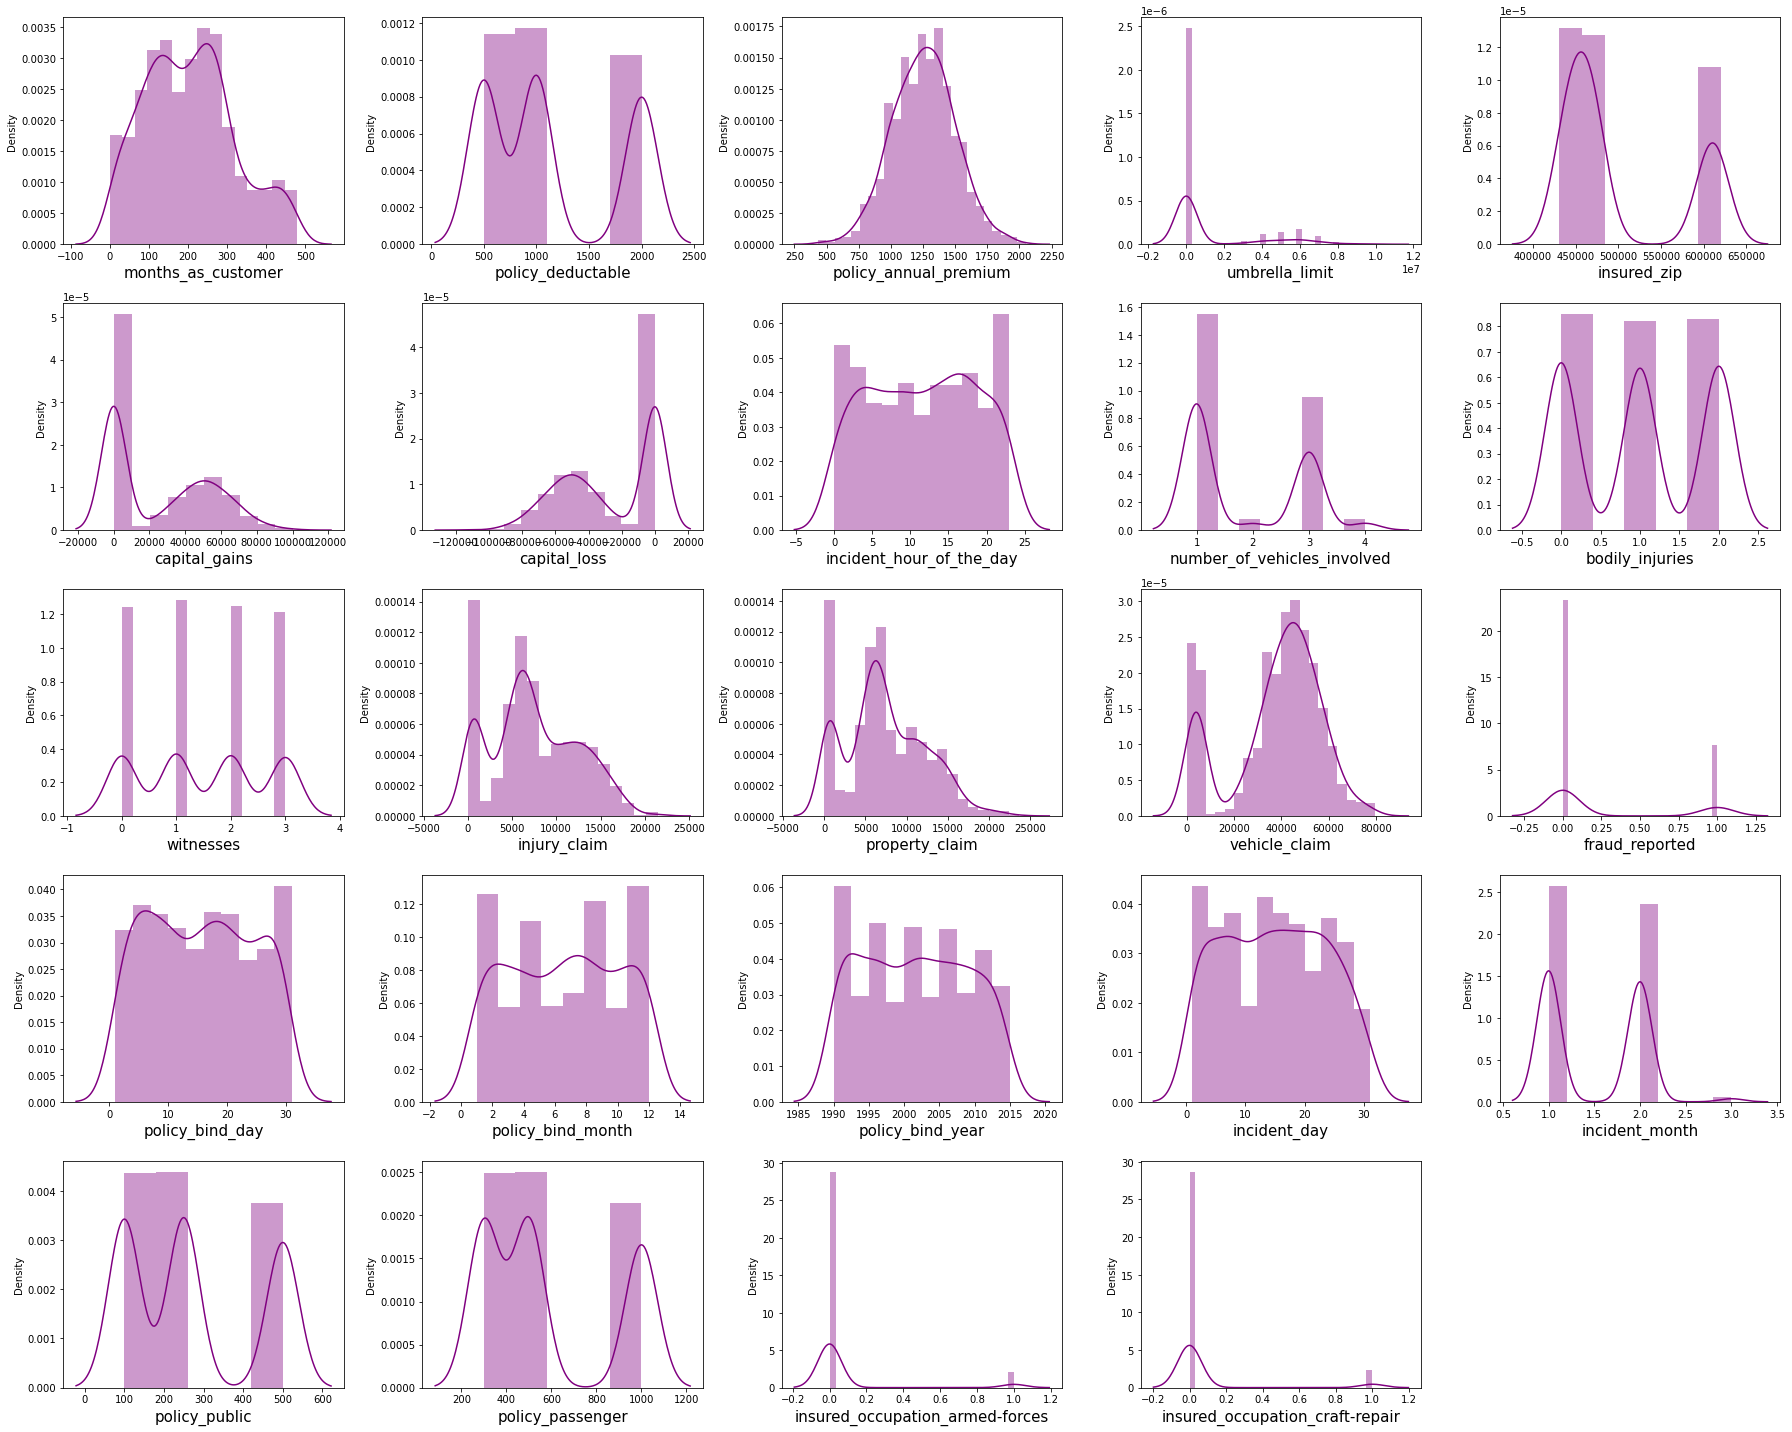

In [70]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col],color='purple')
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Checking Outliers:

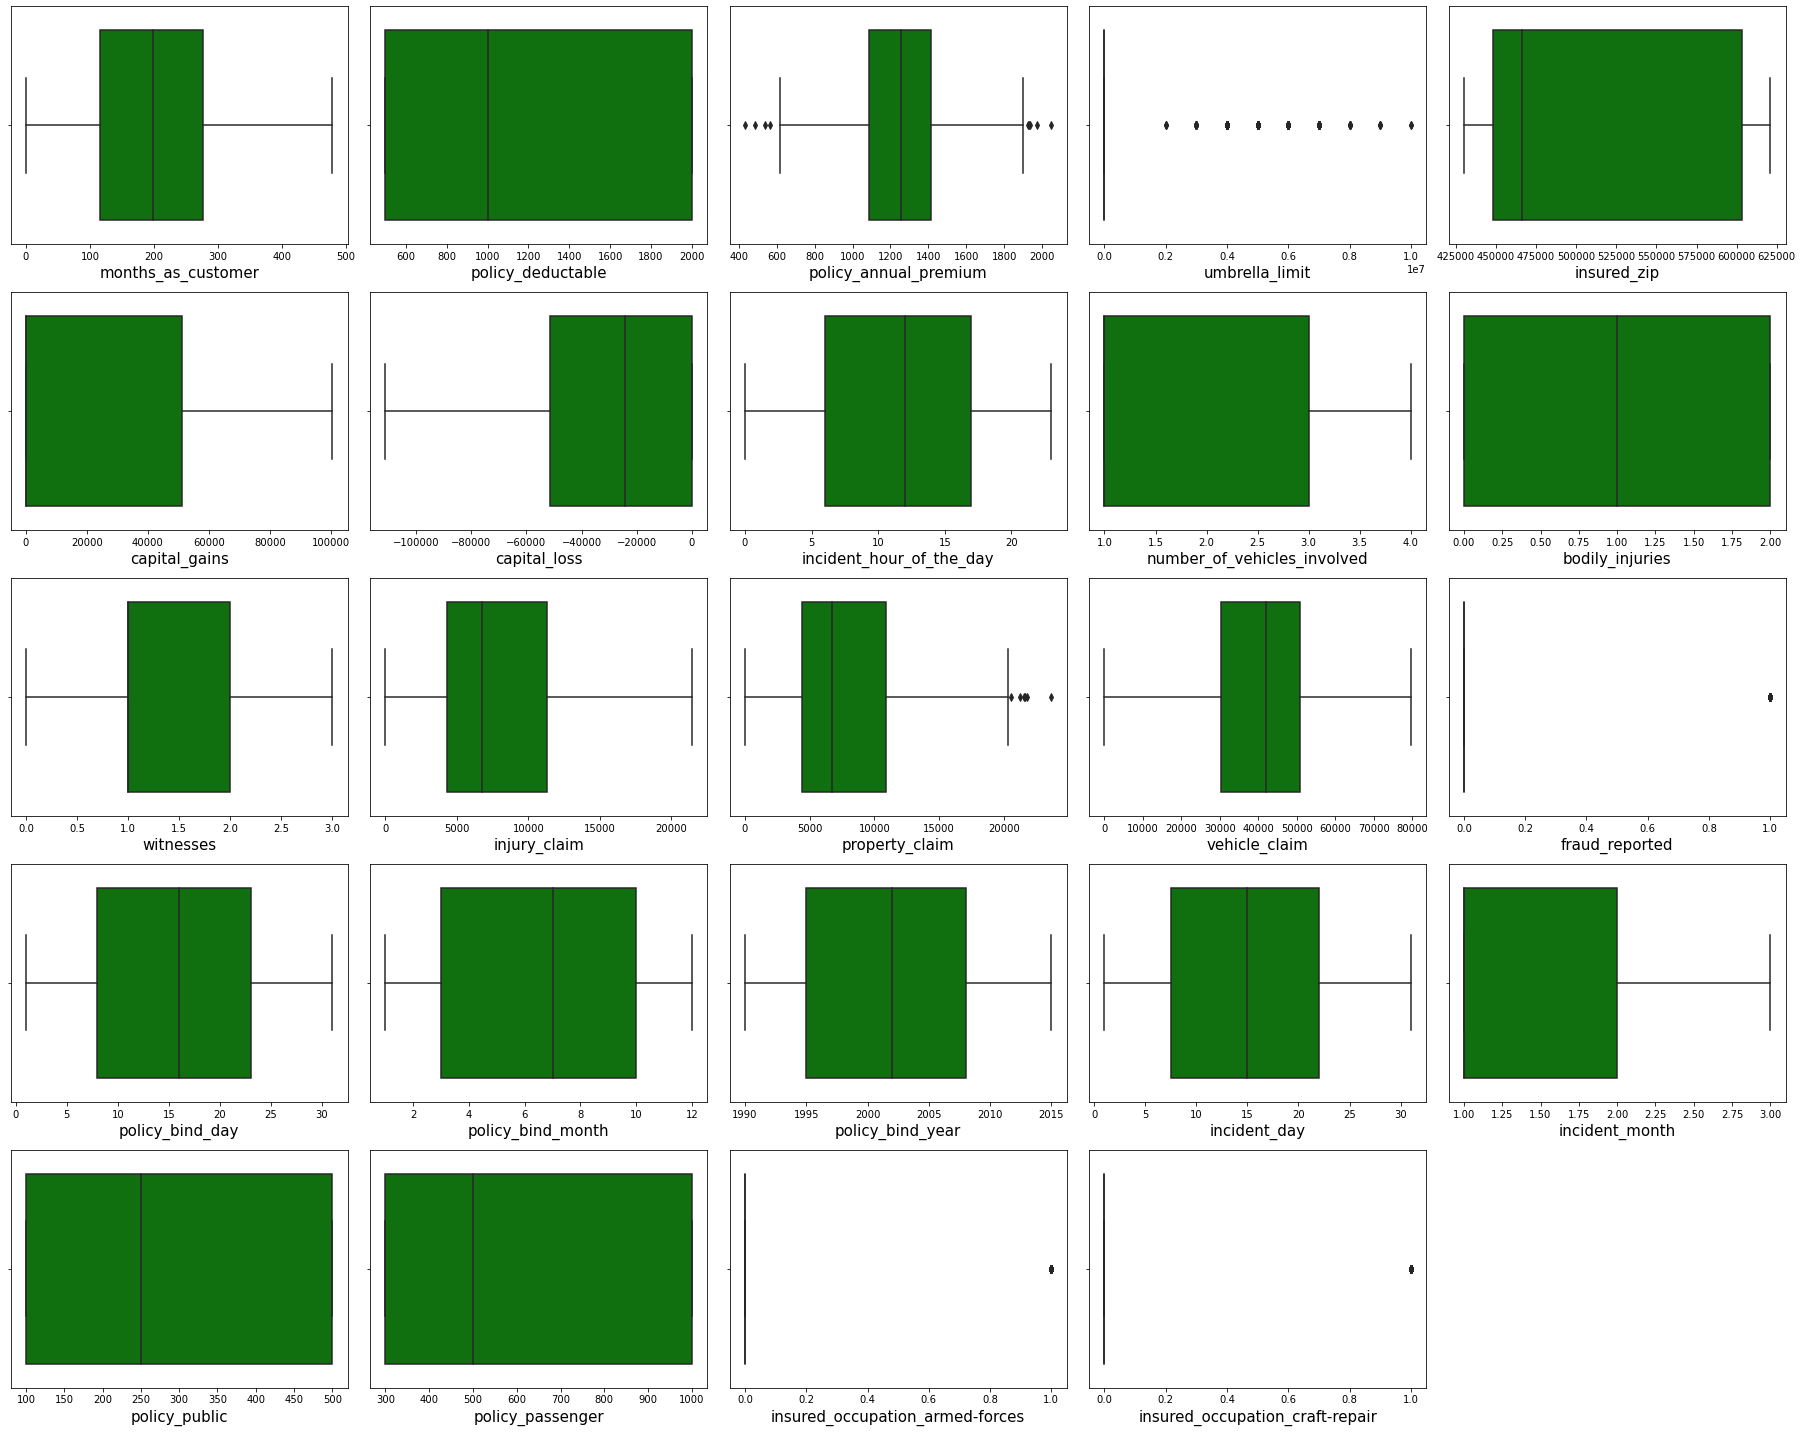

In [71]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

- Seems no outliers present in our dataset:

### Checking Skewness:

In [72]:
for i in df.columns[:20]:
    print(df[i].skew())
    print(i)
    print("***********************")


0.36401401837432346
months_as_customer
***********************
0.4764255057158291
policy_deductable
***********************
0.005374120351683909
policy_annual_premium
***********************
1.8060997781683026
umbrella_limit
***********************
0.8151327026970882
insured_zip
***********************
0.47721966481314687
capital_gains
***********************
-0.38981318779420304
capital_loss
***********************
-0.034989512968707684
incident_hour_of_the_day
***********************
0.5010088575915579
number_of_vehicles_involved
***********************
0.012939810936905662
bodily_injuries
***********************
0.018398622231343843
witnesses
***********************
0.2653818937305787
injury_claim
***********************
0.3781210146021897
property_claim
***********************
-0.6226266309267317
vehicle_claim
***********************
1.1735101158432313
fraud_reported
***********************
0.051640514689185756
policy_bind_day
***********************
-0.01824168696569129
policy_bin

- `insured_zip` `vehicle_claim` and `policy_passenger` showing little high skeness let's fix it
### Handling Skewness:

In [73]:
df

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,age_group_24 - 30,age_group_31 - 35,age_group_36 - 40,age_group_41 - 45,age_group_46 - 50,age_group_51 - 55,age_group_56 - 59,age_group_60+
0,328,1000,1406.91,0.0,466132,53300,0,5,1,1,2,6510,13020,52080,1,17,10,2014,25,1,250,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000.0,468176,0,0,8,1,0,0,780,780,3510,1,27,6,2006,21,1,250,500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,134,2000,1413.14,5000000.0,430632,35100,0,7,3,2,3,7700,3850,23100,0,6,9,2000,22,2,100,300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000.0,608117,48900,-62400,5,1,1,2,6340,6340,50720,1,25,5,1990,10,1,250,500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,6000000.0,610706,66000,-46000,20,1,0,1,1300,650,4550,0,6,6,2014,17,2,500,1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0.0,431289,0,0,20,1,0,1,17440,8720,61040,0,16,7,1991,22,2,500,1000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
996,285,1000,1436.79,0.0,608177,70900,0,23,1,2,3,18080,18080,72320,0,5,1,2014,24,1,100,300,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
997,130,500,1383.49,3000000.0,442797,35100,0,4,3,2,3,7500,7500,52500,0,17,2,2003,23,1,250,500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
998,458,2000,1356.92,5000000.0,441714,0,0,2,1,0,1,5220,5220,36540,0,18,11,2011,26,2,500,1000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [74]:
df.insured_zip=np.cbrt(df['insured_zip'])
df.vehicle_claim=np.square(df['vehicle_claim'])
df.policy_passenger=np.cbrt(df.policy_passenger)
print("skewness insured_zip: ",df.insured_zip.skew())
print("skewness vehicle_claim : ",df.vehicle_claim.skew())
print("skewness policy_passenger: ",df.policy_passenger.skew())

skewness insured_zip:  0.7931861533729095
skewness vehicle_claim :  0.48747566686247723
skewness policy_passenger:  0.4062981270863786


### splitting the dataset:

In [75]:
x=df.drop('fraud_reported',axis=1)
y=df.fraud_reported
x

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,age_group_24 - 30,age_group_31 - 35,age_group_36 - 40,age_group_41 - 45,age_group_46 - 50,age_group_51 - 55,age_group_56 - 59,age_group_60+
0,328,1000,1406.91,0.0,77.535925,53300,0,5,1,1,2,6510,13020,2712326400,17,10,2014,25,1,250,7.937005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000.0,77.649092,0,0,8,1,0,0,780,780,12320100,27,6,2006,21,1,250,7.937005,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,134,2000,1413.14,5000000.0,75.515384,35100,0,7,3,2,3,7700,3850,533610000,6,9,2000,22,2,100,6.694330,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000.0,84.721905,48900,-62400,5,1,1,2,6340,6340,2572518400,25,5,1990,10,1,250,7.937005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,6000000.0,84.841967,66000,-46000,20,1,0,1,1300,650,20702500,6,6,2014,17,2,500,10.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0.0,75.553768,0,0,20,1,0,1,17440,8720,3725881600,16,7,1991,22,2,500,10.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
996,285,1000,1436.79,0.0,84.724692,70900,0,23,1,2,3,18080,18080,5230182400,5,1,2014,24,1,100,6.694330,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
997,130,500,1383.49,3000000.0,76.219873,35100,0,4,3,2,3,7500,7500,2756250000,17,2,2003,23,1,250,7.937005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
998,458,2000,1356.92,5000000.0,76.157683,0,0,2,1,0,1,5220,5220,1335171600,18,11,2011,26,2,500,10.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


### Standarize the Dataset:

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [77]:
## scaling
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head(10)

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,age_group_24 - 30,age_group_31 - 35,age_group_36 - 40,age_group_41 - 45,age_group_46 - 50,age_group_51 - 55,age_group_56 - 59,age_group_60+
0,0.684760,0.333333,0.603112,0.0,0.208695,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.303497,0.550063,0.428501,0.533333,0.818182,0.96,0.800000,0.0,0.375,0.375922,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.475992,1.000000,0.473214,0.5,0.220207,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.036364,0.032953,0.001946,0.866667,0.454545,0.64,0.666667,0.0,0.375,0.375922,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.279749,1.000000,0.606972,0.5,0.003141,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.358974,0.162653,0.084301,0.166667,0.727273,0.40,0.700000,0.5,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.534447,1.000000,0.608582,0.6,0.939738,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.295571,0.267850,0.406414,0.800000,0.363636,0.00,0.300000,0.0,0.375,0.375922,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.475992,0.333333,0.712760,0.6,0.951952,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.060606,0.027461,0.003270,0.166667,0.454545,0.96,0.533333,0.5,1.000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.534447,0.333333,0.568539,0.0,0.277606,0.000000,1.000000,0.826087,0.666667,0.0,0.666667,0.298834,0.270807,0.415438,0.366667,0.818182,0.64,0.033333,0.0,0.375,0.375922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.286013,0.333333,0.557543,0.0,0.068495,0.000000,0.306931,0.000000,0.666667,0.0,0.000000,1.000000,0.302070,0.395747,0.100000,0.454545,0.40,0.400000,0.0,0.375,0.375922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.344468,0.333333,0.435927,0.0,0.916421,0.000000,1.000000,1.000000,0.666667,1.0,0.666667,0.437296,0.396282,0.170275,0.066667,0.090909,0.00,0.866667,0.5,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Model building with SMOTE():

In [78]:
## importing smote

from imblearn.over_sampling import SMOTE
sm=SMOTE(0.75)

In [79]:
### importing train test 
from sklearn.model_selection import train_test_split as tts

In [80]:
### importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [81]:
#### importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [82]:
### Best Random STATE:
def find_state(Model,Feature,Target):
    maximum_roc_score=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=tts(Feature,Target,test_size=0.25,random_state=i)
        x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
        Model.fit(x_train_new,y_train_new)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        roc_score=roc_auc_score(y_test,test_pred)
        print("For Random State {}, the ROC Score is: {}".format(i,roc_score))
        if roc_score>maximum_roc_score:
            
            maximum_roc_score=roc_score
            j=i
    print("\n")        
    print(" The Highest ROC SCORE is: {}".format(maximum_roc_score))
    print("\n The Best Random State is:")
    return j
        

In [83]:
### Print Score:
def Scores(model,X,Y,Random_state,train=True):
    x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=Random_state)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    model.fit(x_train_new,y_train_new)
    if train:
        train_pred=model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,train_pred)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,train_pred))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,train_pred))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,train_pred))
    
    if train==False:
        pred=model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))

In [84]:
### Cross Validation:
### Importing Cross Validation:
from sklearn.model_selection import cross_val_score

In [85]:
def Cross_validation(clf,feature,target,Random_state):
    x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.25,random_state=Random_state)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(2,11):
        score=cross_val_score(clf,feature,target,cv=i)
        mean=score.mean()
        print("\n At cv = ",i)
        print("The Cross Validation Score is : ",mean)
        print("The Accuracy Score is : ",accuracy_score(y_test,pred_y))

### 1. Logistic Regression():

In [86]:
find_state(LogisticRegression(),x,y)

For Random State 1, the ROC Score is: 0.7377577319587629
For Random State 2, the ROC Score is: 0.7613305613305613
For Random State 3, the ROC Score is: 0.8102766798418972
For Random State 4, the ROC Score is: 0.7372311827956989
For Random State 5, the ROC Score is: 0.7371411223870239
For Random State 6, the ROC Score is: 0.8087719298245614
For Random State 7, the ROC Score is: 0.7815850815850817
For Random State 8, the ROC Score is: 0.7365061409179057
For Random State 9, the ROC Score is: 0.7734720176730486
For Random State 10, the ROC Score is: 0.7218337218337219
For Random State 11, the ROC Score is: 0.7287212747217551
For Random State 12, the ROC Score is: 0.7264070006863418
For Random State 13, the ROC Score is: 0.7420634920634922
For Random State 14, the ROC Score is: 0.7344786837560223
For Random State 15, the ROC Score is: 0.7452406609195401
For Random State 16, the ROC Score is: 0.7279992816091954
For Random State 17, the ROC Score is: 0.7633851468048358
For Random State 18, th

3

In [87]:
print(Scores(LogisticRegression(),x,y,3,train=True))
print(Scores(LogisticRegression(),x,y,3,train=False))

After Oversampling the  new shape of Xtrain is :  (994, 61)
After oversampling the new shape of Ytrain is :  (994,)

********************Traning Scores****************************

Accuracy Score is 0.7796780684104627 for Training Model.

 F1 Score for the model is : 
 0.7272727272727274

*******************Confusion Matrix***************************

[[483  85]
 [134 292]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       568
           1       0.77      0.69      0.73       426

    accuracy                           0.78       994
   macro avg       0.78      0.77      0.77       994
weighted avg       0.78      0.78      0.78       994

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.848

 F1 Score for testing is :  0.7285714285714284
Confusion Matrix : 
 [[161  23]
 [ 15  51]]

 The Classification report for Testing 
           

In [89]:
### cross validation for logistic Regression:
Cross_validation(LogisticRegression(),x,y,3)


 At cv =  2
The Cross Validation Score is :  0.7998036072144289
The Accuracy Score is :  0.84

 At cv =  3
The Cross Validation Score is :  0.7787787787787788
The Accuracy Score is :  0.84

 At cv =  4
The Cross Validation Score is :  0.7948273092369479
The Accuracy Score is :  0.84

 At cv =  5
The Cross Validation Score is :  0.7978241206030152
The Accuracy Score is :  0.84

 At cv =  6
The Cross Validation Score is :  0.8008080225091985
The Accuracy Score is :  0.84

 At cv =  7
The Cross Validation Score is :  0.7958661057252607
The Accuracy Score is :  0.84

 At cv =  8
The Cross Validation Score is :  0.7938306451612903
The Accuracy Score is :  0.84

 At cv =  9
The Cross Validation Score is :  0.7977977977977978
The Accuracy Score is :  0.84

 At cv =  10
The Cross Validation Score is :  0.7998383838383838
The Accuracy Score is :  0.84


We can see that our model are got overfitted.

- Best random state for Logistic Regression is 3.
- CV= 6 selected

## 2. KNN Model:

In [90]:
find_state(KNeighborsClassifier(),x,y)

For Random State 1, the ROC Score is: 0.6176362297496318
For Random State 2, the ROC Score is: 0.6245322245322245
For Random State 3, the ROC Score is: 0.6379281949934124
For Random State 4, the ROC Score is: 0.582997311827957
For Random State 5, the ROC Score is: 0.633923150316593
For Random State 6, the ROC Score is: 0.6381578947368423
For Random State 7, the ROC Score is: 0.6620046620046619
For Random State 8, the ROC Score is: 0.6240303813833226
For Random State 9, the ROC Score is: 0.6239874815905744
For Random State 10, the ROC Score is: 0.5774087024087025
For Random State 11, the ROC Score is: 0.6171430859156057
For Random State 12, the ROC Score is: 0.5487302676733012
For Random State 13, the ROC Score is: 0.6214285714285714
For Random State 14, the ROC Score is: 0.5629033724206891
For Random State 15, the ROC Score is: 0.6223060344827587
For Random State 16, the ROC Score is: 0.6389188218390804
For Random State 17, the ROC Score is: 0.6157167530224524
For Random State 18, the 

57

In [91]:
print(Scores(KNeighborsClassifier(),x,y,57,train=True))
print(Scores(KNeighborsClassifier(),x,y,57,train=False))

After Oversampling the  new shape of Xtrain is :  (967, 61)
After oversampling the new shape of Ytrain is :  (967,)

********************Traning Scores****************************

Accuracy Score is 0.7869700103412617 for Training Model.

 F1 Score for the model is : 
 0.7960396039603961

*******************Confusion Matrix***************************

[[359 194]
 [ 12 402]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.65      0.78       553
           1       0.67      0.97      0.80       414

    accuracy                           0.79       967
   macro avg       0.82      0.81      0.79       967
weighted avg       0.84      0.79      0.79       967

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.568

 F1 Score for testing is :  0.40659340659340665
Confusion Matrix : 
 [[105  94]
 [ 14  37]]

 The Classification report for Testing 
          

In [93]:
### corss validation for KNN:
Cross_validation(KNeighborsClassifier(),x,y,15)


 At cv =  2
The Cross Validation Score is :  0.7407494989979959
The Accuracy Score is :  0.552

 At cv =  3
The Cross Validation Score is :  0.7377377377377378
The Accuracy Score is :  0.552

 At cv =  4
The Cross Validation Score is :  0.7467510040160642
The Accuracy Score is :  0.552

 At cv =  5
The Cross Validation Score is :  0.7387487437185929
The Accuracy Score is :  0.552

 At cv =  6
The Cross Validation Score is :  0.7387213524757715
The Accuracy Score is :  0.552

 At cv =  7
The Cross Validation Score is :  0.7357079540178132
The Accuracy Score is :  0.552

 At cv =  8
The Cross Validation Score is :  0.7307419354838709
The Accuracy Score is :  0.552

 At cv =  9
The Cross Validation Score is :  0.7337337337337337
The Accuracy Score is :  0.552

 At cv =  10
The Cross Validation Score is :  0.7427373737373737
The Accuracy Score is :  0.552


kNN model is highly underfitted model:
- best random state for KNN: 57 
- cv=10 selected.

### 3. Desicision TREE:

In [94]:
find_state(DecisionTreeClassifier(),x,y)

For Random State 1, the ROC Score is: 0.6072349042709867
For Random State 2, the ROC Score is: 0.641995841995842
For Random State 3, the ROC Score is: 0.6488801054018446
For Random State 4, the ROC Score is: 0.6087869623655914
For Random State 5, the ROC Score is: 0.6393008933992541
For Random State 6, the ROC Score is: 0.6640350877192983
For Random State 7, the ROC Score is: 0.6923076923076924
For Random State 8, the ROC Score is: 0.5877504848093082
For Random State 9, the ROC Score is: 0.6736929307805597
For Random State 10, the ROC Score is: 0.6045066045066045
For Random State 11, the ROC Score is: 0.6441668668428217
For Random State 12, the ROC Score is: 0.6297185998627317
For Random State 13, the ROC Score is: 0.6865079365079364
For Random State 14, the ROC Score is: 0.6373966003090629
For Random State 15, the ROC Score is: 0.6476293103448276
For Random State 16, the ROC Score is: 0.608746408045977
For Random State 17, the ROC Score is: 0.6419870920825379
For Random State 18, the 

90

In [95]:
print(Scores(DecisionTreeClassifier(),x,y,90,train=True))
print(Scores(DecisionTreeClassifier(),x,y,90,train=False))

After Oversampling the  new shape of Xtrain is :  (985, 61)
After oversampling the new shape of Ytrain is :  (985,)

********************Traning Scores****************************

Accuracy Score is 1.0 for Training Model.

 F1 Score for the model is : 
 1.0

*******************Confusion Matrix***************************

[[563   0]
 [  0 422]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       422

    accuracy                           1.00       985
   macro avg       1.00      1.00      1.00       985
weighted avg       1.00      1.00      1.00       985

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.74

 F1 Score for testing is :  0.4881889763779528
Confusion Matrix : 
 [[154  35]
 [ 30  31]]

 The Classification report for Testing 
               precision    recall  f1-sco

In [96]:
### cross validation:
Cross_validation(DecisionTreeClassifier(),x,y,90)


 At cv =  2
The Cross Validation Score is :  0.7076993987975952
The Accuracy Score is :  0.712

 At cv =  3
The Cross Validation Score is :  0.7057057057057058
The Accuracy Score is :  0.712

 At cv =  4
The Cross Validation Score is :  0.7247911646586345
The Accuracy Score is :  0.712

 At cv =  5
The Cross Validation Score is :  0.7417889447236181
The Accuracy Score is :  0.712

 At cv =  6
The Cross Validation Score is :  0.7127492003943919
The Accuracy Score is :  0.712

 At cv =  7
The Cross Validation Score is :  0.7087701031363002
The Accuracy Score is :  0.712

 At cv =  8
The Cross Validation Score is :  0.7087016129032258
The Accuracy Score is :  0.712

 At cv =  9
The Cross Validation Score is :  0.7217217217217217
The Accuracy Score is :  0.712

 At cv =  10
The Cross Validation Score is :  0.7076969696969697
The Accuracy Score is :  0.712


### Desion Tree is not predicting well!!!!

### 4. SVC:

In [97]:
find_state(SVC(kernel='linear'),x,y)

For Random State 1, the ROC Score is: 0.750460235640648
For Random State 2, the ROC Score is: 0.7663201663201663
For Random State 3, the ROC Score is: 0.8395915678524374
For Random State 4, the ROC Score is: 0.7426075268817205
For Random State 5, the ROC Score is: 0.7617312863214502
For Random State 6, the ROC Score is: 0.8223684210526316
For Random State 7, the ROC Score is: 0.8074592074592074
For Random State 8, the ROC Score is: 0.7365061409179057
For Random State 9, the ROC Score is: 0.8042157584683358
For Random State 10, the ROC Score is: 0.733974358974359
For Random State 11, the ROC Score is: 0.7342461366002081
For Random State 12, the ROC Score is: 0.7425360329444063
For Random State 13, the ROC Score is: 0.7861111111111111
For Random State 14, the ROC Score is: 0.7675665848559222
For Random State 15, the ROC Score is: 0.8013649425287356
For Random State 16, the ROC Score is: 0.747844827586207
For Random State 17, the ROC Score is: 0.7809290064539587
For Random State 18, the R

3

In [98]:
print(Scores(SVC(),x,y,83,train=True))
print(Scores(SVC(),x,y,83,train=False))

After Oversampling the  new shape of Xtrain is :  (990, 61)
After oversampling the new shape of Ytrain is :  (990,)

********************Traning Scores****************************

Accuracy Score is 0.9292929292929293 for Training Model.

 F1 Score for the model is : 
 0.9164677804295943

*******************Confusion Matrix***************************

[[536  30]
 [ 40 384]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       566
           1       0.93      0.91      0.92       424

    accuracy                           0.93       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.93      0.93      0.93       990

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8

 F1 Score for testing is :  0.5614035087719298
Confusion Matrix : 
 [[168  18]
 [ 32  32]]

 The Classification report for Testing 
             

In [99]:
### Cross validation:
Cross_validation(SVC(),x,y,83)


 At cv =  2
The Cross Validation Score is :  0.7737815631262526
The Accuracy Score is :  0.804

 At cv =  3
The Cross Validation Score is :  0.7787787787787788
The Accuracy Score is :  0.804

 At cv =  4
The Cross Validation Score is :  0.7877911646586346
The Accuracy Score is :  0.804

 At cv =  5
The Cross Validation Score is :  0.7998090452261307
The Accuracy Score is :  0.804

 At cv =  6
The Cross Validation Score is :  0.8027799822042662
The Accuracy Score is :  0.804

 At cv =  7
The Cross Validation Score is :  0.8008329698470542
The Accuracy Score is :  0.804

 At cv =  8
The Cross Validation Score is :  0.8008225806451613
The Accuracy Score is :  0.804

 At cv =  9
The Cross Validation Score is :  0.8058058058058059
The Accuracy Score is :  0.804

 At cv =  10
The Cross Validation Score is :  0.804838383838384
The Accuracy Score is :  0.804


SVC is performing well:
- best random state=83 selected.
- best cv=7

## 5. Random Forest:

In [100]:
find_state(RandomForestClassifier(),x,y)

For Random State 1, the ROC Score is: 0.6157032400589102
For Random State 2, the ROC Score is: 0.5440748440748441
For Random State 3, the ROC Score is: 0.6070487483530962
For Random State 4, the ROC Score is: 0.6344926075268817
For Random State 5, the ROC Score is: 0.6295428918379737
For Random State 6, the ROC Score is: 0.6565789473684212
For Random State 7, the ROC Score is: 0.6212121212121212
For Random State 8, the ROC Score is: 0.5966386554621849
For Random State 9, the ROC Score is: 0.6833578792341679
For Random State 10, the ROC Score is: 0.6296620046620046
For Random State 11, the ROC Score is: 0.6028104732164306
For Random State 12, the ROC Score is: 0.6184797529169526
For Random State 13, the ROC Score is: 0.6031746031746031
For Random State 14, the ROC Score is: 0.6108535587673848
For Random State 15, the ROC Score is: 0.623114224137931
For Random State 16, the ROC Score is: 0.6048850574712643
For Random State 17, the ROC Score is: 0.5777656576674848
For Random State 18, the

94

In [101]:
print(Scores(RandomForestClassifier(),x,y,94,train=True))
print(Scores(RandomForestClassifier(),x,y,94,train=False))

After Oversampling the  new shape of Xtrain is :  (995, 61)
After oversampling the new shape of Ytrain is :  (995,)

********************Traning Scores****************************

Accuracy Score is 1.0 for Training Model.

 F1 Score for the model is : 
 1.0

*******************Confusion Matrix***************************

[[569   0]
 [  0 426]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       426

    accuracy                           1.00       995
   macro avg       1.00      1.00      1.00       995
weighted avg       1.00      1.00      1.00       995

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.788

 F1 Score for testing is :  0.5137614678899082
Confusion Matrix : 
 [[169  14]
 [ 39  28]]

 The Classification report for Testing 
               precision    recall  f1-sc

In [103]:
### cross validation:
Cross_validation(RandomForestClassifier(),x,y,94)


 At cv =  2
The Cross Validation Score is :  0.756751503006012
The Accuracy Score is :  0.784

 At cv =  3
The Cross Validation Score is :  0.7587587587587588
The Accuracy Score is :  0.784

 At cv =  4
The Cross Validation Score is :  0.7757831325301205
The Accuracy Score is :  0.784

 At cv =  5
The Cross Validation Score is :  0.7577537688442211
The Accuracy Score is :  0.784

 At cv =  6
The Cross Validation Score is :  0.7637796695765097
The Accuracy Score is :  0.784

 At cv =  7
The Cross Validation Score is :  0.765762406607477
The Accuracy Score is :  0.784

 At cv =  8
The Cross Validation Score is :  0.754758064516129
The Accuracy Score is :  0.784

 At cv =  9
The Cross Validation Score is :  0.7637637637637638
The Accuracy Score is :  0.784

 At cv =  10
The Cross Validation Score is :  0.7537575757575757
The Accuracy Score is :  0.784


 Random Forest is performing well but it shows overfitted after cross validation:
 - best random state= 94
 - best cv=6

## Ada boost:

In [104]:
find_state(AdaBoostClassifier(),x,y)

For Random State 1, the ROC Score is: 0.6740611192930781
For Random State 2, the ROC Score is: 0.6486486486486486
For Random State 3, the ROC Score is: 0.7659749670619236
For Random State 4, the ROC Score is: 0.6644825268817204
For Random State 5, the ROC Score is: 0.6525284066267674
For Random State 6, the ROC Score is: 0.7469298245614036
For Random State 7, the ROC Score is: 0.6892773892773892
For Random State 8, the ROC Score is: 0.6317065287653523
For Random State 9, the ROC Score is: 0.7264359351988218
For Random State 10, the ROC Score is: 0.6813325563325563
For Random State 11, the ROC Score is: 0.6483305308671631
For Random State 12, the ROC Score is: 0.6645504461221688
For Random State 13, the ROC Score is: 0.6619047619047619
For Random State 14, the ROC Score is: 0.6808471957094809
For Random State 15, the ROC Score is: 0.682471264367816
For Random State 16, the ROC Score is: 0.639996408045977
For Random State 17, the ROC Score is: 0.6451686210344514
For Random State 18, the 

3

In [105]:
print(Scores(AdaBoostClassifier(),x,y,3,train=True))
print(Scores(AdaBoostClassifier(),x,y,3,train=False))

After Oversampling the  new shape of Xtrain is :  (994, 61)
After oversampling the new shape of Ytrain is :  (994,)

********************Traning Scores****************************

Accuracy Score is 0.8591549295774648 for Training Model.

 F1 Score for the model is : 
 0.8317307692307692

*******************Confusion Matrix***************************

[[508  60]
 [ 80 346]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       568
           1       0.85      0.81      0.83       426

    accuracy                           0.86       994
   macro avg       0.86      0.85      0.86       994
weighted avg       0.86      0.86      0.86       994

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.808

 F1 Score for testing is :  0.6190476190476191
Confusion Matrix : 
 [[163  21]
 [ 27  39]]

 The Classification report for Testing 
           

In [106]:
### cross validation:
Cross_validation(AdaBoostClassifier(),x,y,3)


 At cv =  2
The Cross Validation Score is :  0.7707675350701403
The Accuracy Score is :  0.816

 At cv =  3
The Cross Validation Score is :  0.7647647647647648
The Accuracy Score is :  0.816

 At cv =  4
The Cross Validation Score is :  0.7697951807228915
The Accuracy Score is :  0.816

 At cv =  5
The Cross Validation Score is :  0.7888140703517588
The Accuracy Score is :  0.816

 At cv =  6
The Cross Validation Score is :  0.7687636774643485
The Accuracy Score is :  0.816

 At cv =  7
The Cross Validation Score is :  0.7758509096537266
The Accuracy Score is :  0.816

 At cv =  8
The Cross Validation Score is :  0.763741935483871
The Accuracy Score is :  0.816

 At cv =  9
The Cross Validation Score is :  0.7807807807807808
The Accuracy Score is :  0.816

 At cv =  10
The Cross Validation Score is :  0.7647373737373737
The Accuracy Score is :  0.816


model got overfitted:
- Best random state=3
- best cv=5

### Gradient Boosting:

In [107]:
find_state(GradientBoostingClassifier(),x,y)

For Random State 1, the ROC Score is: 0.6956921944035346
For Random State 2, the ROC Score is: 0.6920997920997921
For Random State 3, the ROC Score is: 0.7444005270092228
For Random State 4, the ROC Score is: 0.7016129032258064
For Random State 5, the ROC Score is: 0.712030531702663
For Random State 6, the ROC Score is: 0.749561403508772
For Random State 7, the ROC Score is: 0.7631701631701632
For Random State 8, the ROC Score is: 0.6546541693600517
For Random State 9, the ROC Score is: 0.7137334315169366
For Random State 10, the ROC Score is: 0.7177544677544677
For Random State 11, the ROC Score is: 0.6762751221074546
For Random State 12, the ROC Score is: 0.7075326012354152
For Random State 13, the ROC Score is: 0.7170634920634921
For Random State 14, the ROC Score is: 0.7129351877102083
For Random State 15, the ROC Score is: 0.6910919540229884
For Random State 16, the ROC Score is: 0.6814834770114943
For Random State 17, the ROC Score is: 0.6710753567857468
For Random State 18, the 

49

In [108]:
print(Scores(GradientBoostingClassifier(),x,y,49,train=True))
print(Scores(GradientBoostingClassifier(),x,y,49,train=False))

After Oversampling the  new shape of Xtrain is :  (976, 61)
After oversampling the new shape of Ytrain is :  (976,)

********************Traning Scores****************************

Accuracy Score is 0.9487704918032787 for Training Model.

 F1 Score for the model is : 
 0.9397590361445783

*******************Confusion Matrix***************************

[[536  22]
 [ 28 390]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       558
           1       0.95      0.93      0.94       418

    accuracy                           0.95       976
   macro avg       0.95      0.95      0.95       976
weighted avg       0.95      0.95      0.95       976

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.84

 F1 Score for testing is :  0.6491228070175439
Confusion Matrix : 
 [[173  21]
 [ 19  37]]

 The Classification report for Testing 
            

In [109]:
## cross validation:
Cross_validation(GradientBoostingClassifier(),x,y,49)


 At cv =  2
The Cross Validation Score is :  0.7707835671342685
The Accuracy Score is :  0.828

 At cv =  3
The Cross Validation Score is :  0.7727727727727728
The Accuracy Score is :  0.828

 At cv =  4
The Cross Validation Score is :  0.7798032128514056
The Accuracy Score is :  0.828

 At cv =  5
The Cross Validation Score is :  0.7737939698492463
The Accuracy Score is :  0.828

 At cv =  6
The Cross Validation Score is :  0.7798078541711758
The Accuracy Score is :  0.828

 At cv =  7
The Cross Validation Score is :  0.7808740555219428
The Accuracy Score is :  0.828

 At cv =  8
The Cross Validation Score is :  0.7778145161290323
The Accuracy Score is :  0.828

 At cv =  9
The Cross Validation Score is :  0.7837837837837838
The Accuracy Score is :  0.828

 At cv =  10
The Cross Validation Score is :  0.7718080808080808
The Accuracy Score is :  0.828


model is highly overfitted.
- best random state for gradient boosting: 49
- best cv= 9

## XGB

In [110]:
from xgboost import XGBClassifier

In [111]:
find_state(XGBClassifier(),x,y)

[22:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Random State 1, the ROC Score is: 0.6895250368188514
[22:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Random State 2, the ROC Score is: 0.6463617463617464
[22:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

6

In [112]:
print(Scores(XGBClassifier(),x,y,6,train=True))
print(Scores(XGBClassifier(),x,y,6,train=False))

[22:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After Oversampling the  new shape of Xtrain is :  (983, 61)
After oversampling the new shape of Ytrain is :  (983,)

********************Traning Scores****************************

Accuracy Score is 1.0 for Training Model.

 F1 Score for the model is : 
 1.0

*******************Confusion Matrix***************************

[[562   0]
 [  0 421]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           1       1.00      1.00      1.00       421

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00  

In [113]:
### cross validation:
Cross_validation(XGBClassifier(),x,y,6)

[22:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 At cv =  2
The Cross Validation Score is :  0.7747835671342685
The A

- Best random state for xgb 6:
- best cv=4

## `Logistic Regression`,`SVC` and `XGB` give us the Best Accuracy. We will Tune the parameter for these models and Select one as best Fit Model:

## Hyperparameter Tunning:
##### 1. Logistic Regression

In [115]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=3)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
LogisticRegression().fit(x_train_new,y_train_new)


params={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
       'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'multi_class' : ['auto', 'ovr', 'multinomial'],
       'C':[0.001,0.01,0.1,0.2,1]}

In [116]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [123]:
GridSearch=GridSearchCV(LogisticRegression(),params,cv=6,n_jobs=-1)
GridSearch.fit(x_train_new,y_train_new)

GridSearchCV(cv=6, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [124]:
GridSearch.best_params_

{'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [125]:
lr=LogisticRegression(C=1,multi_class='auto',penalty='l1',solver='saga')
lr.fit(x_train_new,y_train_new)
lr.predict(x_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", score)
print("\n F1 Score for testing is : ", f1_score(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n The Classification report for Testing \n", classification_report(y_test,y_pred))




***********************Testing Scores******************************

Accuracy score for testing is :  0.856

 F1 Score for testing is :  0.7428571428571429
Confusion Matrix : 
 [[162  22]
 [ 14  52]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       184
           1       0.70      0.79      0.74        66

    accuracy                           0.86       250
   macro avg       0.81      0.83      0.82       250
weighted avg       0.86      0.86      0.86       250



## AUC Curve and ROC SCore:

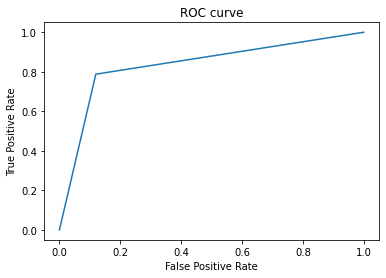

AUC value is 0.8341567852437417 


In [126]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## SVC:

In [127]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=83)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
SVC().fit(x_train_new,y_train_new)


param={'kernel' : ['linear', 'poly', 'rbf'],
       'C':[0.001,0.01,0.1,0.2,1],
       'gamma' : [0.01,0.1,0.2,0.3]}

In [128]:
Grid=GridSearchCV(SVC(),param,cv=7,n_jobs=-1)
Grid.fit(x_train_new,y_train_new)

GridSearchCV(cv=7, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 1],
                         'gamma': [0.01, 0.1, 0.2, 0.3],
                         'kernel': ['linear', 'poly', 'rbf']})

In [129]:
Grid.best_params_

{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [130]:
svc=SVC(C=1,kernel='rbf',gamma=0.3)
svc.fit(x_train_new,y_train_new)
svc.predict(x_train)
pred=svc.predict(x_test)
scores=accuracy_score(y_test,pred)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", scores)
print("\n F1 Score for testing is : ", f1_score(y_test,pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
print("\n The Classification report for Testing \n", classification_report(y_test,pred))




***********************Testing Scores******************************

Accuracy score for testing is :  0.76

 F1 Score for testing is :  0.23076923076923078
Confusion Matrix : 
 [[181   5]
 [ 55   9]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       186
           1       0.64      0.14      0.23        64

    accuracy                           0.76       250
   macro avg       0.70      0.56      0.54       250
weighted avg       0.74      0.76      0.70       250



## ROC and AUC:

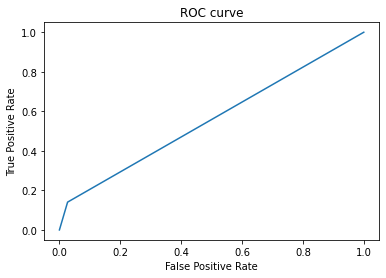

AUC value is 0.5568716397849462 


In [131]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## XGB

In [132]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=6)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
XGBClassifier().fit(x_train_new,y_train_new)

[23:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
grid_param={'n_estimators':[50,100,200],
           'learning_rate':[0.001,0.01,0.1,1],
           'max_depth':list(range(2,15))}

In [134]:
grid=GridSearchCV(XGBClassifier(),grid_param,cv=4,n_jobs=-1)
grid.fit(x_train_new,y_train_new)

[23:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [135]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

In [136]:
### reassigning the attributes of the model:-
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=8)

xgb.fit(x_train_new,y_train_new)
y_pred=xgb.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
print("\n F1 Score for testing is : ", f1_score(y_test,y_pred))

matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,y_pred))

[23:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



***********************Testing Scores******************************

Accuracy score for testing is :  0.844

 F1 Score for testing is :  0.6486486486486486
Confusion Matrix : 
 [[175  15]
 [ 24  36]]
True positives are :-  175
False positives are :-  15
False negatives are :-  24
True negatives are :-  36

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       190
           1       0.71      0.60      0.65        60

    accuracy                           0.84       250
   macro avg       0.79      0.76      0.77       250
weighted avg       0.84      0.84      0.84       250



## ROC& AUC:

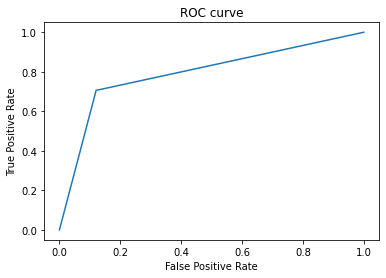

AUC value is 0.7926396689328998 


In [137]:
fpr, tpr, threshold= roc_curve(y_pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## After tunning the parameter ` Logistic Regression` gives us The Best Accuracy.

## Saving the Model:

In [138]:
import joblib
joblib.dump(lr,'Automobile_insurance_Fraud_Prediction')

['Automobile_insurance_Fraud_Prediction']

## Acutal VS Predicted:

In [139]:
original=np.array(y_test)
predicted=np.array(lr.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
245,0,1
246,1,1
247,1,0
248,1,0
